# Linear methods : Comparison

For each vector (*Difficulty and Ability*) we have two linar methods including or not the notion of attempts.

Here is a summary of the result for the application of those methods

We have 4 different possibilities.


In [226]:
subs = generate_submissions(users=4, pbls=4)
bm = bianary_mat(subs)
bm

,U00000,U00001,U00002,U00003
P00000,1,1,1,1
P00001,0,1,0,1
P00002,1,1,1,0
P00003,1,1,0,1


In [227]:
def linear1(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return  (row[1] * vector).sum() / len(row[1])

def linear2(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return 1 - ((row[1] * vector).sum()  / len(row[1]))

def linear3(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return  (row[1] * vector).sum() / len(row[1])

def process_bianary_mat(bm, rel_v, f=linear1, name='V', Horiz=False):
    '''
    evaluate the vector from a bm using a method
    and relatively to another vector
    '''
    # evaluate for each row of the binary table
    bmm = bm
    if Horiz:
        bmm=bm.T
    
    vector = [f(row, rel_v) for row in bmm.iterrows()]
    vector = pd.Series(vector, index=bmm.index, 
                             name=name)
    normalize(vector)
    
    return vector

In [228]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Difficulies')
normalize(Difficulties)
Difficulties

P00000    0.5
P00001    0.5
P00002    0.5
P00003    0.5
Name: Difficulies, dtype: float64

In [229]:
Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities')
normalize(Abilities)
Abilities

U00000    0.5
U00001    0.5
U00002    0.5
U00003    0.5
Name: Abilities, dtype: float64

## Difficultied first

In [230]:
#Difficulties = process_bianary_mat(bm, Abilities, name=Difficulties.name)
Difficulties = process_bianary_mat(bm, Abilities,f=linear2 , name=Difficulties.name)
Abilities = process_bianary_mat(bm, Difficulties, name=Abilities.name, Horiz=True)

In [231]:
print Difficulties
print Abilities

P00000    0.396059
P00001    0.594089
P00002    0.495074
P00003    0.495074
Name: Difficulies, dtype: float64
U00000    0.466149
U00001    0.665927
U00002    0.299667
U00003    0.499445
Name: Abilities, dtype: float64


In [232]:
dfAbl = pd.DataFrame(Abilities)
dfAbl

,Abilities
U00000,0.466149
U00001,0.665927
U00002,0.299667
U00003,0.499445


In [233]:
dfDiff = pd.DataFrame(Difficulties)
dfDiff

,Difficulies
P00000,0.396059
P00001,0.594089
P00002,0.495074
P00003,0.495074


## Abilities First

In [234]:
Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities')
normalize(Abilities)
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Difficulies')
normalize(Difficulties)
Abilities = process_bianary_mat(bm, Difficulties, name=Abilities.name+"2", Horiz=True)
Difficulties = process_bianary_mat(bm, Abilities,f=linear2 , name=Difficulties.name+"2")

In [235]:
print Difficulties
print Abilities

P00000    0.414611
P00001    0.578390
P00002    0.512879
P00003    0.480123
Name: Difficulies2, dtype: float64
U00000    0.486664
U00001    0.648886
U00002    0.324443
U00003    0.486664
Name: Abilities2, dtype: float64


In [236]:
dfAbl[Abilities.name] = Abilities
dfAbl

,Abilities,Abilities2
U00000,0.466149,0.486664
U00001,0.665927,0.648886
U00002,0.299667,0.324443
U00003,0.499445,0.486664


In [237]:
dfDiff[Difficulties.name] = Difficulties
dfDiff

,Difficulies,Difficulies2
P00000,0.396059,0.414611
P00001,0.594089,0.578390
P00002,0.495074,0.512879
P00003,0.495074,0.480123


<IPython.core.display.Javascript object>


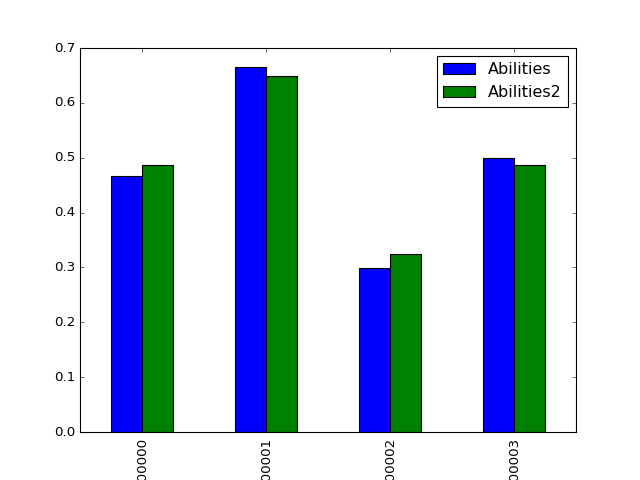

In [239]:
dfAbl.plot(kind='bar')

<IPython.core.display.Javascript object>


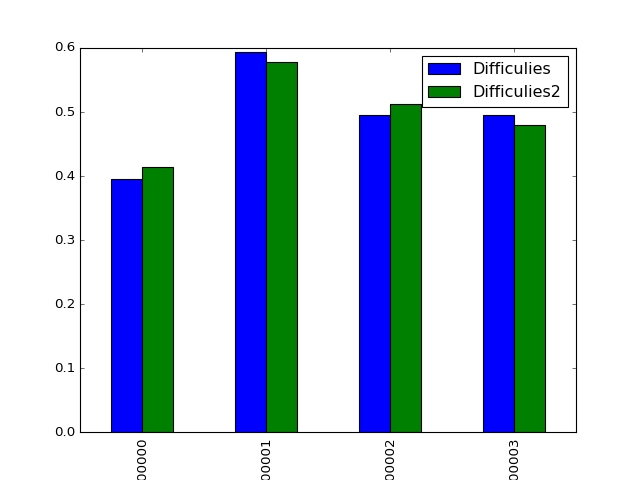

In [241]:
dfDiff.plot(kind='bar')